In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os

# cargar los datos
df = pd.read_csv("../../datasets/balanced-1000.csv")

# separar las características (X) y la etiqueta (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)


In [8]:
# crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(343, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(170, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/500
38/38 [==============================] - 2s 10ms/step - loss: 0.9293 - accuracy: 0.7317 - val_loss: 0.5250 - val_accuracy: 0.8033
Epoch 2/500
38/38 [==============================] - 0s 6ms/step - loss: 1.0691 - accuracy: 0.7833 - val_loss: 0.5172 - val_accuracy: 0.8083
Epoch 3/500
38/38 [==============================] - 0s 6ms/step - loss: 1.1373 - accuracy: 0.7750 - val_loss: 0.4671 - val_accuracy: 0.8217
Epoch 4/500
38/38 [==============================] - 0s 5ms/step - loss: 1.3910 - accuracy: 0.7183 - val_loss: 0.4840 - val_accuracy: 0.8167
Epoch 5/500
38/38 [==============================] - 0s 6ms/step - loss: 1.3481 - accuracy: 0.7962 - val_loss: 0.5527 - val_accuracy: 0.7983
Epoch 6/500
38/38 [==============================] - 0s 5ms/step - loss: 0.5763 - accuracy: 0.7871 - val_loss: 0.4938 - val_accuracy: 0.8100
Epoch 7/500
38/38 [==============================] - 0s 5ms/step - loss: 1.0066 - accuracy: 0.7604 - val_loss: 0.4587 - val_accuracy: 0.8183
Epoch 8/500


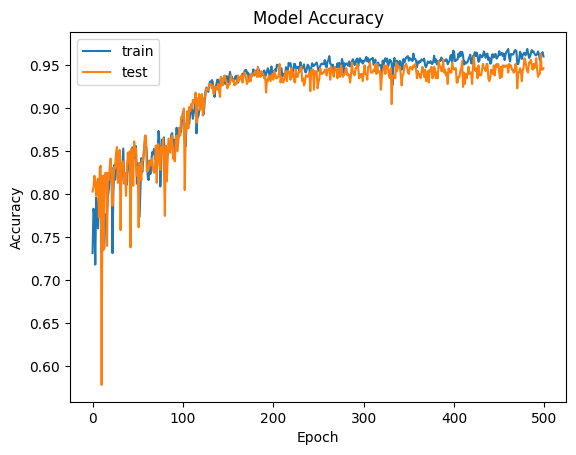

In [10]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# SAVE MODEL

In [11]:
# Save the model to a single file
model.save( './rna_balance.keras', save_format='keras_v3')

# Results

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)


19/19 [==============================] - 0s 2ms/step
[[195   2   3]
 [  5 179  16]
 [  0   6 194]]


In [13]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9750    0.9750    0.9750       200
           1     0.9572    0.8950    0.9251       200
           2     0.9108    0.9700    0.9395       200

    accuracy                         0.9467       600
   macro avg     0.9477    0.9467    0.9465       600
weighted avg     0.9477    0.9467    0.9465       600



In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9466666666666667


In [15]:
from sklearn.metrics import cohen_kappa_score, classification_report

print("Cohen's kappa: ", cohen_kappa_score(y_test, y_pred))

Cohen's kappa:  0.92


In [16]:
print("size of the splits")
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.size)
print("y_pred: ", y_pred.size)

size of the splits
X_train:  (2400, 343)
X_test:  (600, 343)
y_test:  600
y_pred:  600
